<a href="https://www.kaggle.com/code/christopherambala/spotify-analysis?scriptVersionId=147976361" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**ABOUT DATASET.**

**track_name:** Name of the song

**artist(s)_name:** Name of the artist(s) of the song

**artist_count:** Number of artists contributing to the song

**released_year:** Year when the song was released

**released_month:** Month when the song was released

**released_day:** Day of the month when the song was released

**in_spotify_playlists:** Number of Spotify playlists the song is included in

**in_spotify_charts:** Presence and rank of the song on Spotify charts

**streams:** Total number of streams on Spotify

**in_apple_playlists:** Number of Apple Music playlists the song is included in

**in_apple_charts:** Presence and rank of the song on Apple Music charts

**in_deezer_playlists:** Number of Deezer playlists the song is included in

**in_deezer_charts:** Presence and rank of the song on Deezer charts

**in_shazam_charts:** Presence and rank of the song on Shazam charts

**bpm:** Beats per minute, a measure of song tempo

**key:** Key of the song

**mode:** Mode of the song (major or minor)

**danceability_%:** Percentage indicating how suitable the song is for dancing

**valence_%:** Positivity of the song's musical content

**energy_%:** Perceived energy level of the song

**acousticness_%:** Amount of acoustic sound in the song

**instrumentalness_%:** Amount of instrumental content in the song

**liveness_%:** Presence of live performance elements

**speechiness_%:** Amount of spoken words in the song

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',100)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.0f}'.format

In [3]:
spotify=pd.read_csv("/kaggle/input/top-spotify-songs-2023/spotify-2023.csv",encoding='latin')
spotify.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,222,43,13,418,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,89,30,13,194,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,210,48,11,953,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,110,66,13,339,170,D,Minor,81,56,48,21,0,8,33


**Cleaning**.

The aim of this is to:
* Check duplicate rows.
* Incorrect column data type.

In [4]:
spotify_copy = spotify.copy() #get a copy
songs = spotify_copy[['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts',
        'danceability_%', 'energy_%']]

Check on duplicate and drop where necessary.

In [5]:
duplicates = songs[songs[['track_name','artist(s)_name']].duplicated()]
songs = songs.drop(duplicates.index.tolist())
songs.reset_index(drop=True, inplace=True) #reset index

In [6]:
columns =['artist_count','in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm','danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%','released_year'] 
spotify[columns] = spotify[columns].apply(pd.to_numeric, errors='coerce')

In [7]:
spotify.tail(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
943,Privileged Rappers,"Drake, 21 Savage",2,2022,11,4,1007,0,112436403,6,5,3,0,0,144,F,Major,93,62,61,0,0,12,20
944,The Astronaut,Jin,1,2022,10,28,481,9,203436468,10,100,15,1,27,125,F,Major,54,22,76,0,0,14,3
945,BackOutsideBoyz,Drake,1,2022,11,4,1045,0,93367537,8,5,2,0,0,142,F,Minor,85,40,43,4,0,39,32
946,Broke Boys,"Drake, 21 Savage",2,2022,11,4,1060,0,106249219,3,8,5,0,0,120,D,Major,64,11,53,1,0,25,27
947,The Great War,Taylor Swift,1,2022,10,21,1274,0,181382590,1,6,11,0,0,96,F,Major,57,55,74,22,0,8,4
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,18,32,1,0,90,E,Minor,61,32,67,15,0,11,5


# **Data exploration.** #

In [8]:
spotify.shape

(953, 24)

In [9]:
spotify.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [10]:
spotify.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,953,2,1,1,1,1,2,8
released_year,953,2018,11,1930,2020,2022,2022,2023
released_month,953,6,4,1,3,6,9,12
released_day,953,14,9,1,6,13,22,31
in_spotify_playlists,953,5200,7898,31,875,2224,5542,52898
in_spotify_charts,953,12,20,0,0,3,16,147
streams,952,514137425,566856949,2762,141636175,290530915,673869022,3703895074
in_apple_playlists,953,68,86,0,13,34,88,672
in_apple_charts,953,52,51,0,7,38,87,275
in_deezer_playlists,874,110,179,0,12,36,110,974


In [11]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   874 non-null    float64
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      896 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

In [12]:
spotify.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts        57
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

# **Most Streamed Song:** #

In [13]:
most_streamed_songs = spotify[['artist(s)_name','track_name','streams']].nlargest(10,'streams')
display(most_streamed_songs)

,artist(s)_name,track_name,streams
55,The Weeknd,Blinding Lights,3703895074
179,Ed Sheeran,Shape of You,3562543890
86,Lewis Capaldi,Someone You Loved,2887241814
620,Tones and I,Dance Monkey,2864791672
41,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,2808096550
162,"Drake, WizKid, Kyla",One Dance,2713922350
84,"Justin Bieber, The Kid Laroi",STAY (with Justin Bieber),2665343922
140,Imagine Dragons,Believer,2594040133
725,"The Chainsmokers, Halsey",Closer,2591224264
48,"The Weeknd, Daft Punk",Starboy,2565529693


**Blinding Lights** by the weekend is the most streamed song with over **3.7B+** views.

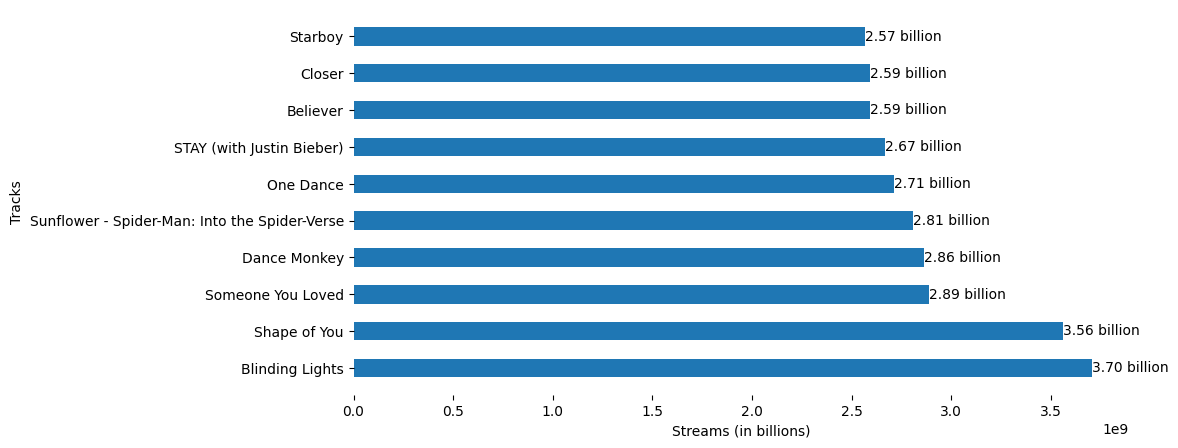

In [14]:
top_10_streams = spotify.nlargest(10, 'streams')
fig, ax = plt.subplots(figsize=(10,5))
bar_container = ax.barh(top_10_streams['track_name'], top_10_streams['streams'], height = 0.5);
ax.set(xlabel='Streams (in billions)',ylabel= 'Tracks')
ax.bar_label(bar_container, fmt=lambda x: f'{x / 10**9:.2f} billion')
#remove spines
for location in ['top','bottom','left','right']:
    ax.spines[location].set_visible(False)

# **Most Streamed Artist:** #

In [15]:
most_streamed_artists = spotify.groupby('artist(s)_name')[['streams']].sum().nlargest(10,'streams')
display(most_streamed_artists)

,streams
artist(s)_name,
The Weeknd,14185552870
Taylor Swift,14053658300
Ed Sheeran,13908947204
Harry Styles,11608645649
Bad Bunny,9997799607
Olivia Rodrigo,7442148916
Eminem,6183805596
Bruno Mars,5846920599
Arctic Monkeys,5569806731


**The Weekend** tops as the most Streamed artist on spotify.

# **How many songs does each artist have on the most streamed song list:** #

In [16]:
total_appearances = len(spotify)
artist_appearances_count = spotify['artist(s)_name'].value_counts().reset_index()
artist_appearances_count.columns = ['artist(s)_name', 'count']
artist_appearances_count['percentage_of_total'] = (artist_appearances_count['count'] / total_appearances) * 100
most_appeared_artists_percentage = artist_appearances_count.nlargest(10, 'percentage_of_total')
display(most_appeared_artists_percentage)

,artist(s)_name,count,percentage_of_total
0,Taylor Swift,34,4
1,The Weeknd,22,2
2,Bad Bunny,19,2
3,SZA,19,2
4,Harry Styles,17,2
5,Kendrick Lamar,12,1
6,Morgan Wallen,11,1
7,Ed Sheeran,9,1
8,BTS,8,1
9,Feid,8,1


**4%** of song list was released by Taylor Swift,The Weekend coming second with **2%**.

# **Lets explore on how often each artist shows up in playlists (top 15)** #

In [17]:
most_streamed_artists = spotify.groupby('artist(s)_name')[['in_spotify_playlists','in_apple_playlists','in_deezer_playlists']].sum().nlargest(10, ['in_spotify_playlists','in_apple_playlists','in_deezer_playlists'])
display(most_streamed_artists)

,in_spotify_playlists,in_apple_playlists,in_deezer_playlists
artist(s)_name,,,
The Weeknd,144053,1677,2138
Taylor Swift,132974,1796,1708
Ed Sheeran,128758,1448,1702
Harry Styles,110026,1741,2483
Eminem,87331,475,0
Arctic Monkeys,84016,241,1170
Coldplay,75716,381,805
Avicii,68241,407,0
"Dr. Dre, Snoop Dogg",65728,283,0


# **What makes the best song the best:** #

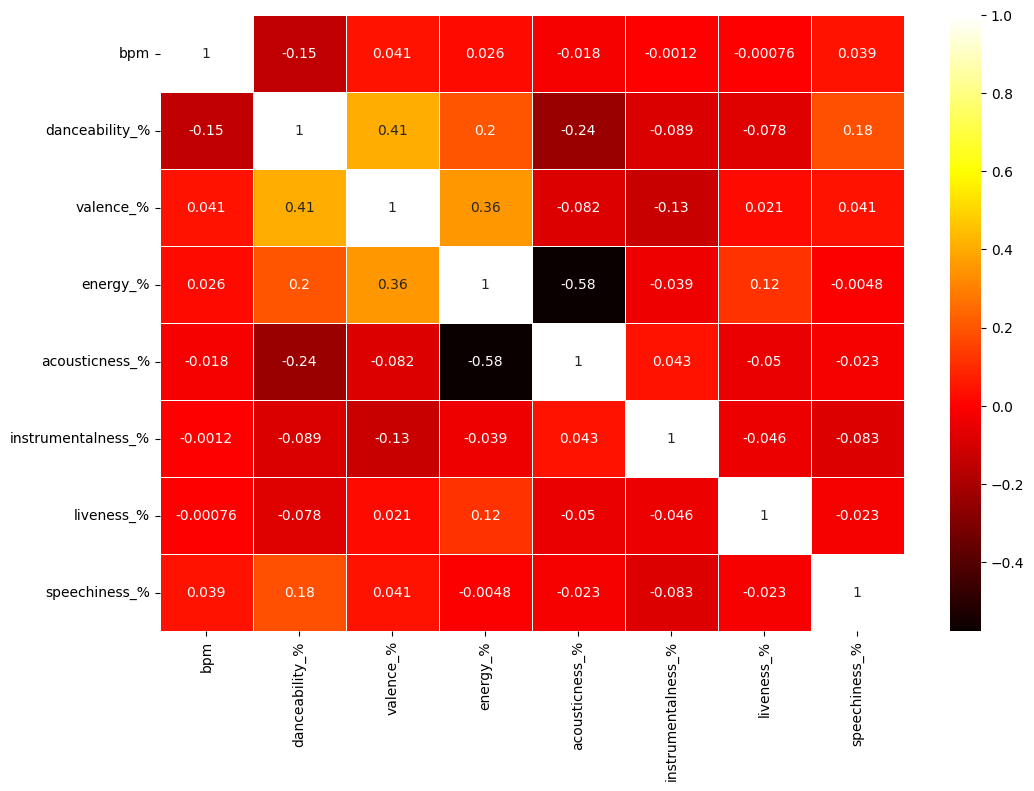

In [18]:
cols=['bpm','danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
correlation_matrix = spotify[cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='hot', linewidths=.5)
plt.show()

Majority of columns have weak negative correlation with the number of streams, indicating a mild inverse relationship.
It should be noted that the practical significance of these weak correlations may be limited.


* Danceable Songs: There is a moderate positive correlation between danceability and valence. This suggests that when aiming to create a danceable song, it's likely to have a more positive or cheerful mood (valence).
* Energetic Songs: You found a moderate negative correlation between acousticness and energy. This implies that songs with lower acousticness (less acoustic, more electronic) tend to have higher energy levels. Therefore, if you're looking to create a more energetic song, reducing acoustic elements and incorporating more electronic or produced elements may be effective